In [170]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import plotly.graph_objects as go
import scipy.cluster.hierarchy as sch


#to visualize all the columns when running df.head
pd.set_option('display.max_columns', 21)

Reading the content in our dataset

In [171]:
path = './shopEasy.csv'
df = pd.read_csv(path)

**Exploratory Data Analysis**
The goal of this project is to understand buying habits and behaviours of customers from a leading e-commerce site named ShopEasy, that sells a variety of products.

Understand Dataset

In [172]:
df.head()

,personId,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage
0,C10573,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,0.166667,1,8,1500.0,236.764555,207.007715,0.00,6,New York,Premium,60
1,C16889,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,0.500000,8,0,2000.0,89.741508,173.276205,0.00,6,Los Angeles,Premium,5
2,C12964,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,0.083333,1,1,2500.0,234.271939,117.297542,0.25,12,New York,Student,21
3,C11171,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,5000.0,0.000000,NaN,0.00,12,Chicago,Premium,53
4,C17582,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,1500.0,118.438703,54.138711,0.00,6,New York,Premium,59


Visualize all the columns in a list.

In [173]:
df.columns

Index(['personId', 'accountTotal', 'frequencyIndex', 'itemCosts',
       'singleItemCosts', 'multipleItemCosts', 'emergencyFunds',
       'itemBuyFrequency', 'singleItemBuyFrequency',
       'multipleItemBuyFrequency', 'emergencyUseFrequency', 'emergencyCount',
       'itemCount', 'maxSpendLimit', 'monthlyPaid', 'leastAmountPaid',
       'paymentCompletionRate', 'accountLifespan', 'location', 'accountType',
       'webUsage'],
      dtype='object')

Visualize each type of data we are working with.

In [174]:
df.dtypes

personId                     object
accountTotal                float64
frequencyIndex              float64
itemCosts                   float64
singleItemCosts             float64
multipleItemCosts           float64
emergencyFunds              float64
itemBuyFrequency            float64
singleItemBuyFrequency      float64
multipleItemBuyFrequency    float64
emergencyUseFrequency       float64
emergencyCount                int64
itemCount                     int64
maxSpendLimit               float64
monthlyPaid                 float64
leastAmountPaid             float64
paymentCompletionRate       float64
accountLifespan               int64
location                     object
accountType                  object
webUsage                      int64
dtype: object


The dataset provides a mix of numerical and categorical data, ideal for segmentation and clustering analysis.

We remove 'personId' column as it will not impact the segmentation of the customers.

In [175]:
df = df.drop(columns='personId')
df

,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,emergencyCount,itemCount,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,location,accountType,webUsage
0,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,0.166667,1,8,1500.0,236.764555,207.007715,0.000000,6,New York,Premium,60
1,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,0.500000,8,0,2000.0,89.741508,173.276205,0.000000,6,Los Angeles,Premium,5
2,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,0.083333,1,1,2500.0,234.271939,117.297542,0.250000,12,New York,Student,21
3,0.000000,0.000000,12.65,0.00,12.65,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,5000.0,0.000000,NaN,0.000000,12,Chicago,Premium,53
4,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,1500.0,118.438703,54.138711,0.000000,6,New York,Premium,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,2901.999862,1.000000,11250.65,10165.88,1084.77,0.000000,1.000000,1.000000,0.750000,0.000000,0,274,9500.0,6443.381719,691.328423,0.083333,12,Chicago,Student,59
8946,25.998310,0.454545,398.57,111.24,287.33,0.000000,0.333333,0.083333,0.250000,0.000000,0,4,2500.0,821.069037,132.906041,0.800000,12,New York,Premium,17
8947,1859.165344,1.000000,0.00,0.00,0.00,1543.160715,0.000000,0.000000,0.000000,0.083333,5,0,3500.0,310.775643,659.586136,0.000000,12,Los Angeles,Student,54
8948,2931.237524,1.000000,150.00,150.00,0.00,1434.135353,0.083333,0.083333,0.000000,0.083333,3,3,3000.0,577.725789,1683.482088,0.000000,12,Los Angeles,Premium,59



Here is a more detailed explanation of each feature:
- personId: Unique identifier for each user on the platform
- accountTotal: Total amount spent by the user on ShopEasy since their registration
- frequencyIndex: Reflects how frequently the user shops, with 1 being very frequent and 0 being less frequent.
- itemCosts: Total costs of items purchased by the user
- singleItemCosts: Costs of items that the user bought in a single purchase without opting for
installments
- multipleItemCosts: Costs of items that the user decided to buy in installments
- emergencyFunds: Amount that the user decided to keep as a backup in their ShopEasy wallet
for faster checkout or emergency purchases
- itemBuyFrequency: Frequency with which the user makes purchases
- singleItemBuyFrequency: How often the user makes single purchases without opting for
installments
- multipleItemBuyFrequency: How often the user opts for installment-based purchases
- emergencyUseFrequency: How frequently the user taps into their emergency funds
- emergencyCount: Number of times the user has used their emergency funds
- itemCount: Total number of individual items purchased by the user
- maxSpendLimit: The maximum amount the user can spend in a single purchase, set by
ShopEasy based on user's buying behavior and loyalty
- monthlyPaid: Total amount paid by the user every month
- leastAmountPaid: The least amount paid by the user in a single transaction
- paymentCompletionRate: Percentage of purchases where the user has paid the full amount
- accountLifespan: Duration for which the user has been registered on ShopEasy
- location: User's city or region
- accountType: The type of account held by the user. Regular for most users, Premium for
those who have subscribed to ShopEasy premium services, and Student for users who have
registered with a student ID
- webUsage: A metric (0-100) indicating the frequency with which the user shops on ShopEasy
via web browsers. A higher number indicates more frequent web usage

# **Check Data Integrity**

Checking for duplicate values.

In [176]:
duplicates = df.duplicated().sum()
duplicates

0

Checking for missing values

In [177]:
missing_values = df.isnull().sum()

print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
accountTotal                  0
frequencyIndex                0
itemCosts                     0
singleItemCosts               0
multipleItemCosts             0
emergencyFunds                0
itemBuyFrequency              0
singleItemBuyFrequency        0
multipleItemBuyFrequency      0
emergencyUseFrequency         0
emergencyCount                0
itemCount                     0
maxSpendLimit                 1
monthlyPaid                   0
leastAmountPaid             313
paymentCompletionRate         0
accountLifespan               0
location                      0
accountType                   0
webUsage                      0
dtype: int64


Below we use a function to check the percentage of missing values as well as the columns that contain the missing values.

In [178]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(df)

Your selected dataframe has 20 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
leastAmountPaid,313,3.5
maxSpendLimit,1,0.0


The table above shows the percentage of total values missing. For "leastAmountPaid" the percentage of total values missing is 3.5% but for "maxSpendLimit", the function depicts 0 percent although there is 1 missing value. This means that the percentage of total values missing is so small that the function rounded the percentage to 0.
Due to the percentage being so low for maxSpendLimit, it would be costless to drop the 1 row out of 8950 with the missing value.
Since the missing values in 'leastAmountPaid' have such a low percentage of total values missing rounded to 3.5% it would not be significant enough to impact the data and due to this lack of significance  the values are therefore dropped.

# Dropping Values

We drop the missing value rows and print out the number of rows dropped.

In [179]:
# Drop rows with missing 'leastAmountPaid' and 'maxSpendLimit' values
df2 = df.dropna()

# Calculate the number of rows dropped
rows_dropped = len(df) - len(df2)

# Print the number of rows dropped
print(f"Number of Rows Dropped: {rows_dropped}")

Number of Rows Dropped: 314


# Check data integrity again for df2

Cheking for missing values in the new dataset.

In [180]:
# Check for missing values
missing_values = df2.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
accountTotal                0
frequencyIndex              0
itemCosts                   0
singleItemCosts             0
multipleItemCosts           0
emergencyFunds              0
itemBuyFrequency            0
singleItemBuyFrequency      0
multipleItemBuyFrequency    0
emergencyUseFrequency       0
emergencyCount              0
itemCount                   0
maxSpendLimit               0
monthlyPaid                 0
leastAmountPaid             0
paymentCompletionRate       0
accountLifespan             0
location                    0
accountType                 0
webUsage                    0
dtype: int64


No missing data, good!

We use the following to understand the dataset more clearly.

In [181]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
accountTotal,8636.0,1601.224893,2095.571300,0.000000,148.095189,916.855459,2105.195853,19043.13856
frequencyIndex,8636.0,0.895035,0.207697,0.000000,0.909091,1.000000,1.000000,1.00000
itemCosts,8636.0,1025.433874,2167.107984,0.000000,43.367500,375.405000,1145.980000,49039.57000
singleItemCosts,8636.0,604.901438,1684.307803,0.000000,0.000000,44.995000,599.100000,40761.25000
multipleItemCosts,8636.0,420.843533,917.245182,0.000000,0.000000,94.785000,484.147500,22500.00000
emergencyFunds,8636.0,994.175523,2121.458303,0.000000,0.000000,0.000000,1132.385490,47137.21176
itemBuyFrequency,8636.0,0.496000,0.401273,0.000000,0.083333,0.500000,0.916667,1.00000
singleItemBuyFrequency,8636.0,0.205909,0.300054,0.000000,0.000000,0.083333,0.333333,1.00000
multipleItemBuyFrequency,8636.0,0.368820,0.398093,0.000000,0.000000,0.166667,0.750000,1.00000
emergencyUseFrequency,8636.0,0.137604,0.201791,0.000000,0.000000,0.000000,0.250000,1.50000


From this description of the dataframe we can already notice some data that doesn't match. The most obvious example is in how the max value of leastAmountPaid is higher than the max value of account total. This could be due to a recording error, or something similar.


Univariate analysis:
An univariate analysis provides insight on how a single variable is distributed across the dataframe. The analysis is conducted using boxplot and histogram to visualize the data as most of the data are numerical features.

Below we write a function to create histograms that can depict the distribution of each variable.

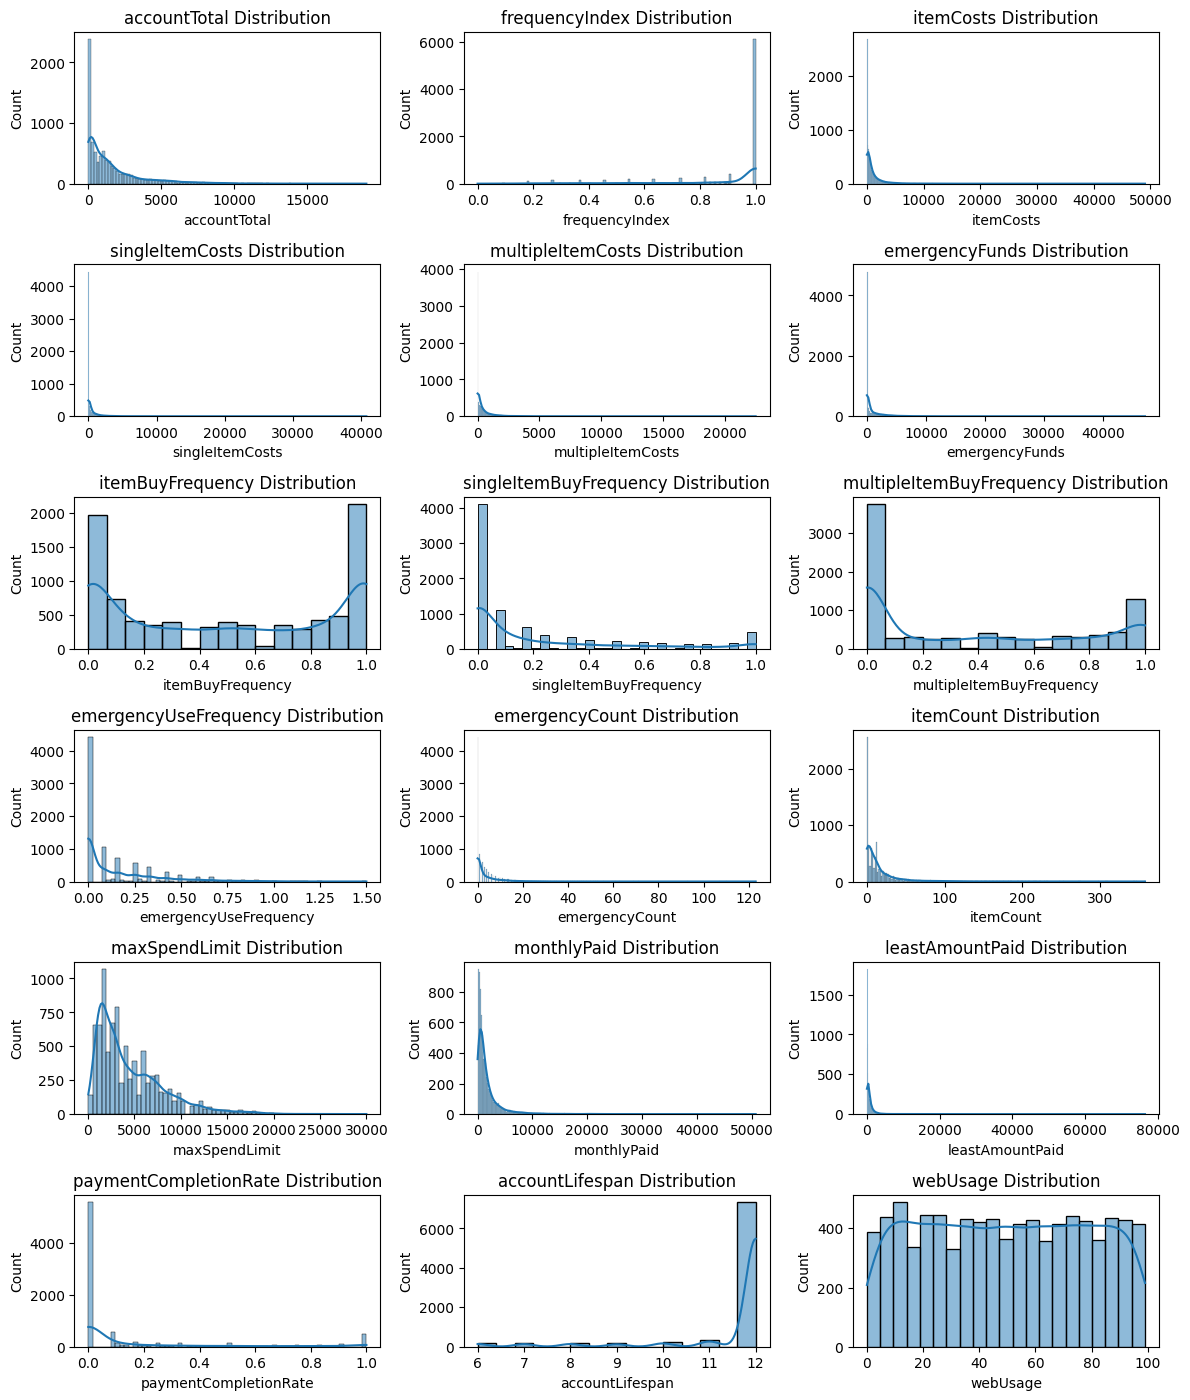

In [182]:
plt.figure(figsize=(12,16))
for i, j in enumerate(df2.describe().columns): #i represents index while j represents column name
    plt.subplot(7,3, i+1)#7 represents row while 3 represents column and i+1 ensures each subplot is placed in correct position in this grid
    sns.histplot(data=df2, x=j, kde=True)
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    plt.tight_layout()
plt.show()

From this data we can notice a lot of the features have right skewed distributions such as accountTotal, itemCosts, maxSpendLimit ect. A few have left skewed distributions such as frequencyIndex and accountLifespan. itemBuyFrequency instead has a bimodal distribution and webusage has a uniform distirbution. Skewed distribution can suggest a high concentration of values on the higher or lower end of the scale, depending on left or right skewed distribution respectively and can suggest that outliers are present. Therefore we create boxplots to visualize the outliers.

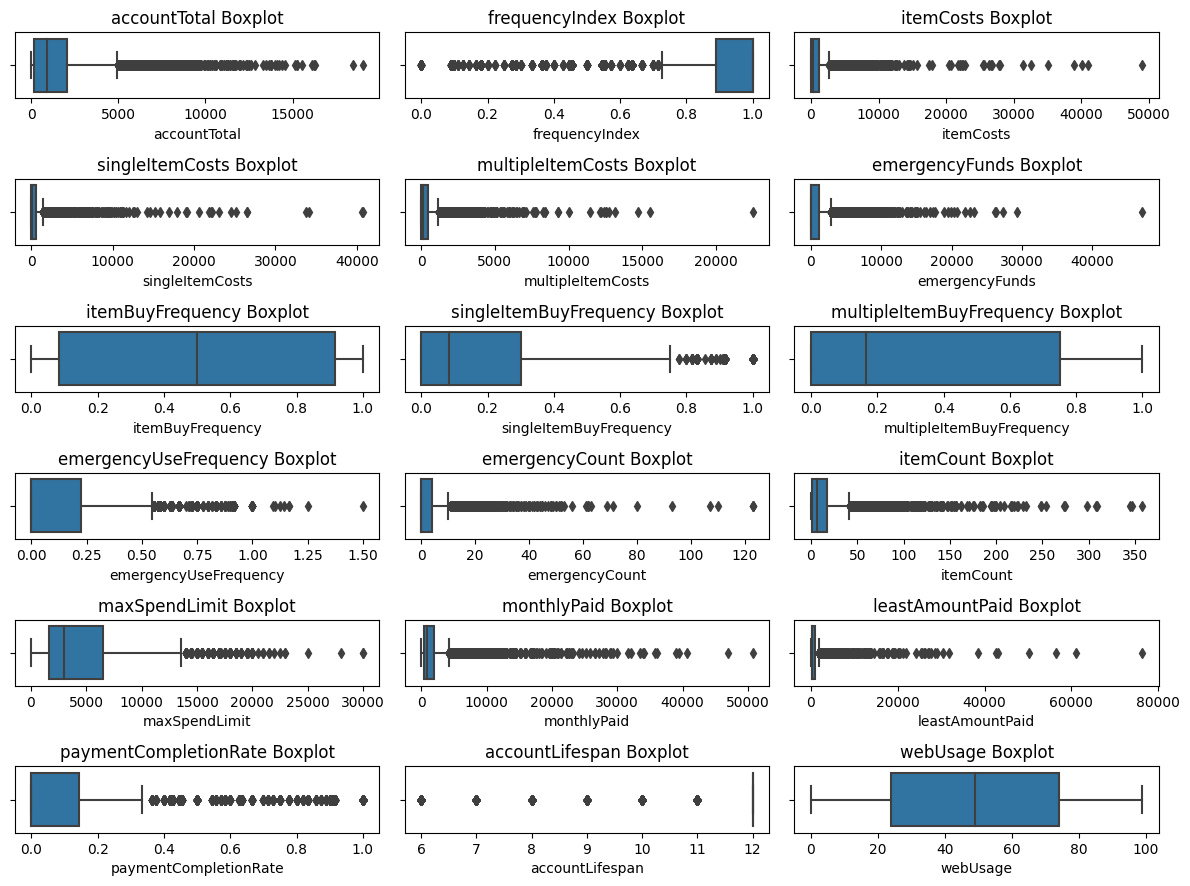

In [183]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(12,10))
for i, j in enumerate(df.describe().columns):
    plt.subplot(7,3, i+1)
    sns.boxplot(x=df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

In numerous of the box plots we observe a large number of outliers that suggest there is high variations in some of these features. However, before further analyzing the outliers we will want to do that after choosing the features that fit best for the purpose of clustering.

Bivariate analysis:
We proceed with bivariate analysis to examine the relationships between pairs of variables. Here we choose to examine pairs of variables that showed similar values to eachother from the boxplots. We notice similar values between itemCosts and singleItemCosts as well as itemBuyFrequency and multipleItemBuyFrequency. Anything that is missed will be further analyzed in the multivariate analysis. Another interesting observation that could be analyzed is how leastAmountPaid has outliers that reach around 80000 in value, which is much higher than the highest value in monthlyPaid or worst accountTotal. This also raises some question on the integrity of the attribute monthlyPaid as the description of the feature is very vague only describing "Total amount paid by the user every month" which is assuming an user pays the same total amount every month or it might be an average. Instead for accountTotal, not only does leastAmountPaid have higher values than it, which would already be an anomaly as in no case would "The least amount paid by the user in a single transaction" be higher than the "Total amount spent by the user on ShopEasy since their registration". This is because leastAmountPaid should be included in the total amount spent by user on ShopEasy, so under normal circumstances accountTotal should always be higher than leastAmountPaid.

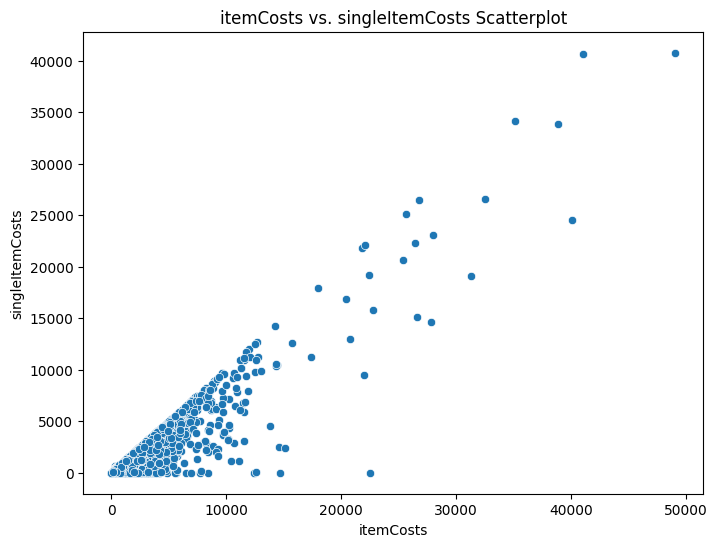

In [184]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=df2.itemCosts, y=df2.singleItemCosts)
plt.title('itemCosts vs. singleItemCosts Scatterplot')
plt.savefig('scatter.png')
plt.show()

We can observe that there is a strong positive relationship between the two variables. This makes sense as the variables described are very similar in nature and definition one being "Costs of items that the user bought in a single purchase without opting for
installments", and another being "Total costs of items purchased by the user".To be more precise we and also calculate their correlation.

In [185]:
print('Correlation between itemCosts and singleItemCosts is : {}'.format(round(df2.corr(numeric_only=True)['itemCosts']['singleItemCosts'], 3)))

Correlation between itemCosts and singleItemCosts is : 0.917


As seen in the result the correlation is very strong (close to 1) and this might suggest that most users would opt for single purchases without multiple installments therefore there total costs of items purchased including items purchased with multiple installments has such high correlation with singleItemCosts. Another possibility is that single purchases are worth more than multiple installment purchases in value and therefore they have such a high correlation.

In [186]:
print('Correlation between itemCosts and multipleItemCosts is : {}'.format(round(df2.corr(numeric_only=True)['itemCosts']['multipleItemCosts'], 3)))

Correlation between itemCosts and multipleItemCosts is : 0.679


We check the correlation between itemCosts and multipleItemCosts which is also moderately strong and positive.

Doing the same thing for itemBuyFrequency and multipleItemBuyFrequency we are also able to observe that there is a strong correlation between itemBuyFrequency and multipleItemBuyFrequency which suggest that users opt more for multiple installments. The positive correlation means as itemBuyFrequency increases so does multipleItemBuyFrequency.

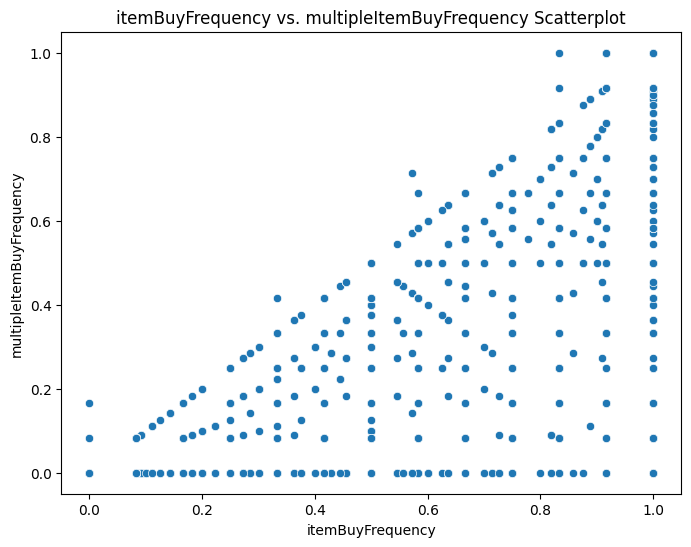

In [187]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=df2.itemBuyFrequency, y=df2.multipleItemBuyFrequency)
plt.title('itemBuyFrequency vs. multipleItemBuyFrequency Scatterplot')
plt.savefig('scatter.png')
plt.show()

In [188]:
print('Correlation between itemBuyFrequency and multipleItemBuyFrequency is : {}'.format(round(df2.corr(numeric_only=True)['itemBuyFrequency']['multipleItemBuyFrequency'], 3)))

Correlation between itemBuyFrequency and multipleItemBuyFrequency is : 0.862


We also want to observe the anomaly between these two relationships.

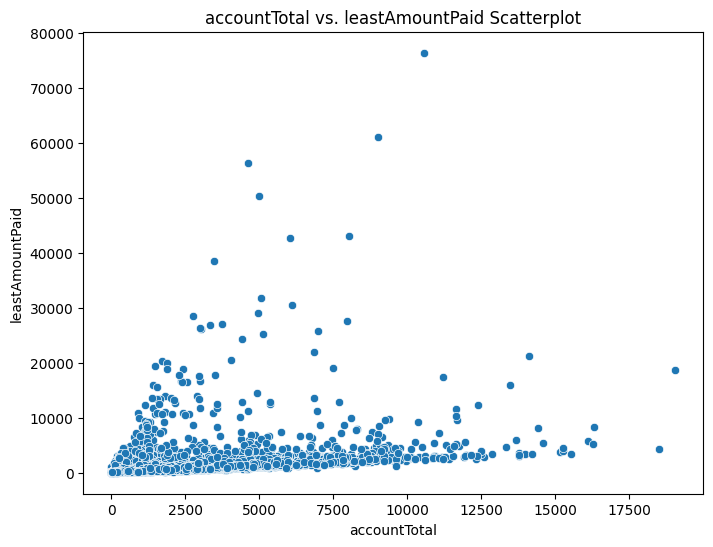

In [189]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=df2.accountTotal, y=df2.leastAmountPaid)
plt.title('accountTotal vs. leastAmountPaid Scatterplot')
plt.savefig('scatter.png')
plt.show()

In [190]:
print('Correlation between accountTotal and leastAmountPaid is : {}'.format(round(df2.corr(numeric_only=True)['accountTotal']['leastAmountPaid'], 3)))

Correlation between accountTotal and leastAmountPaid is : 0.399


 As it can be seen that numerous users have values from leastAmountPaid higher than the values from accountTotal which should not be possible.

We can also observe distribution of categorical features such as location and accountType. We do this analysis to observe if there is any particular location where there is a higher distribution of users or whether a higher distribution of users using a certain account type.

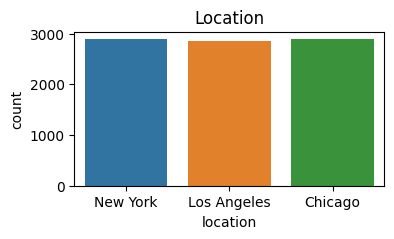

In [191]:
plt.figure(figsize=(4, 2))
sns.countplot(data=df2, x="location")
plt.title("Location")
plt.show()

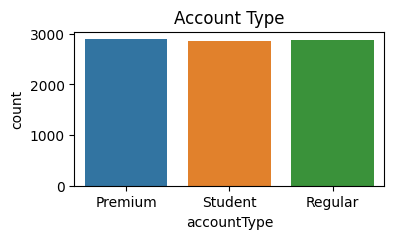

In [192]:
plt.figure(figsize=(4, 2))
sns.countplot(data=df2, x="accountType")
plt.title("Account Type")
plt.show()

The distribution plots above suggest that both categorical features have equal distribution across all users.

Next we use the KDE(Kernel Density Estimate) function to demonstrate the categorical feature distributions to another function such as itemBuyFrequency. This is computed to understand whether there is a difference in distribution between the two attributes which can lead to understanding if accountType or Location has an effect on buying habits or behavior of the customers.

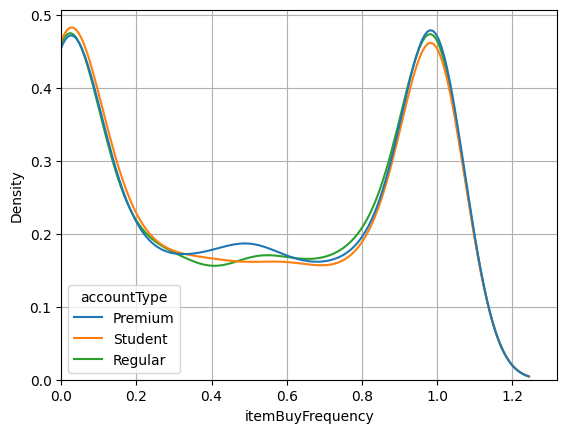

In [193]:
ax = sns.kdeplot(data = df2, x = "itemBuyFrequency", hue='accountType', multiple='layer')
ax.set_xlim(0,None)
ax.grid()

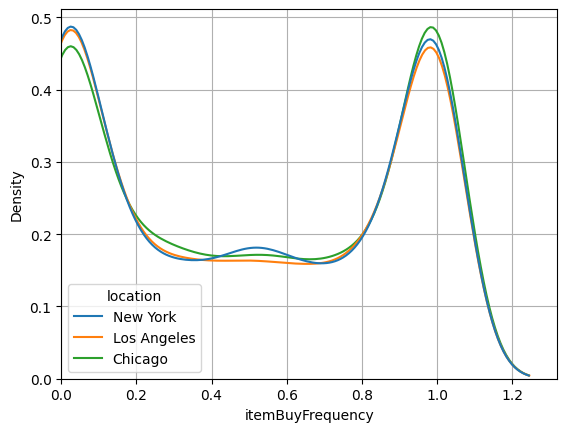

In [194]:
ax = sns.kdeplot(data = df2, x = "itemBuyFrequency", hue='location', multiple='layer')
ax.set_xlim(0,None)
ax.grid()

The KDE plots above display similar distribution for both categorical attributes and itemBuyFrequency suggesting that different accountType and location do not affect distribution of other features.
We decide that the location feature might not be relevant to understanding buying habits and behaviour of customers, as they have no effect on the distribution of other features and in a e-commerce context where almost everything is done online, on a website, location does not really matter.

We use a pairplot to further observe whether there is a correlation between accountType and other significant features that might impact customer buying habits and behaviour.

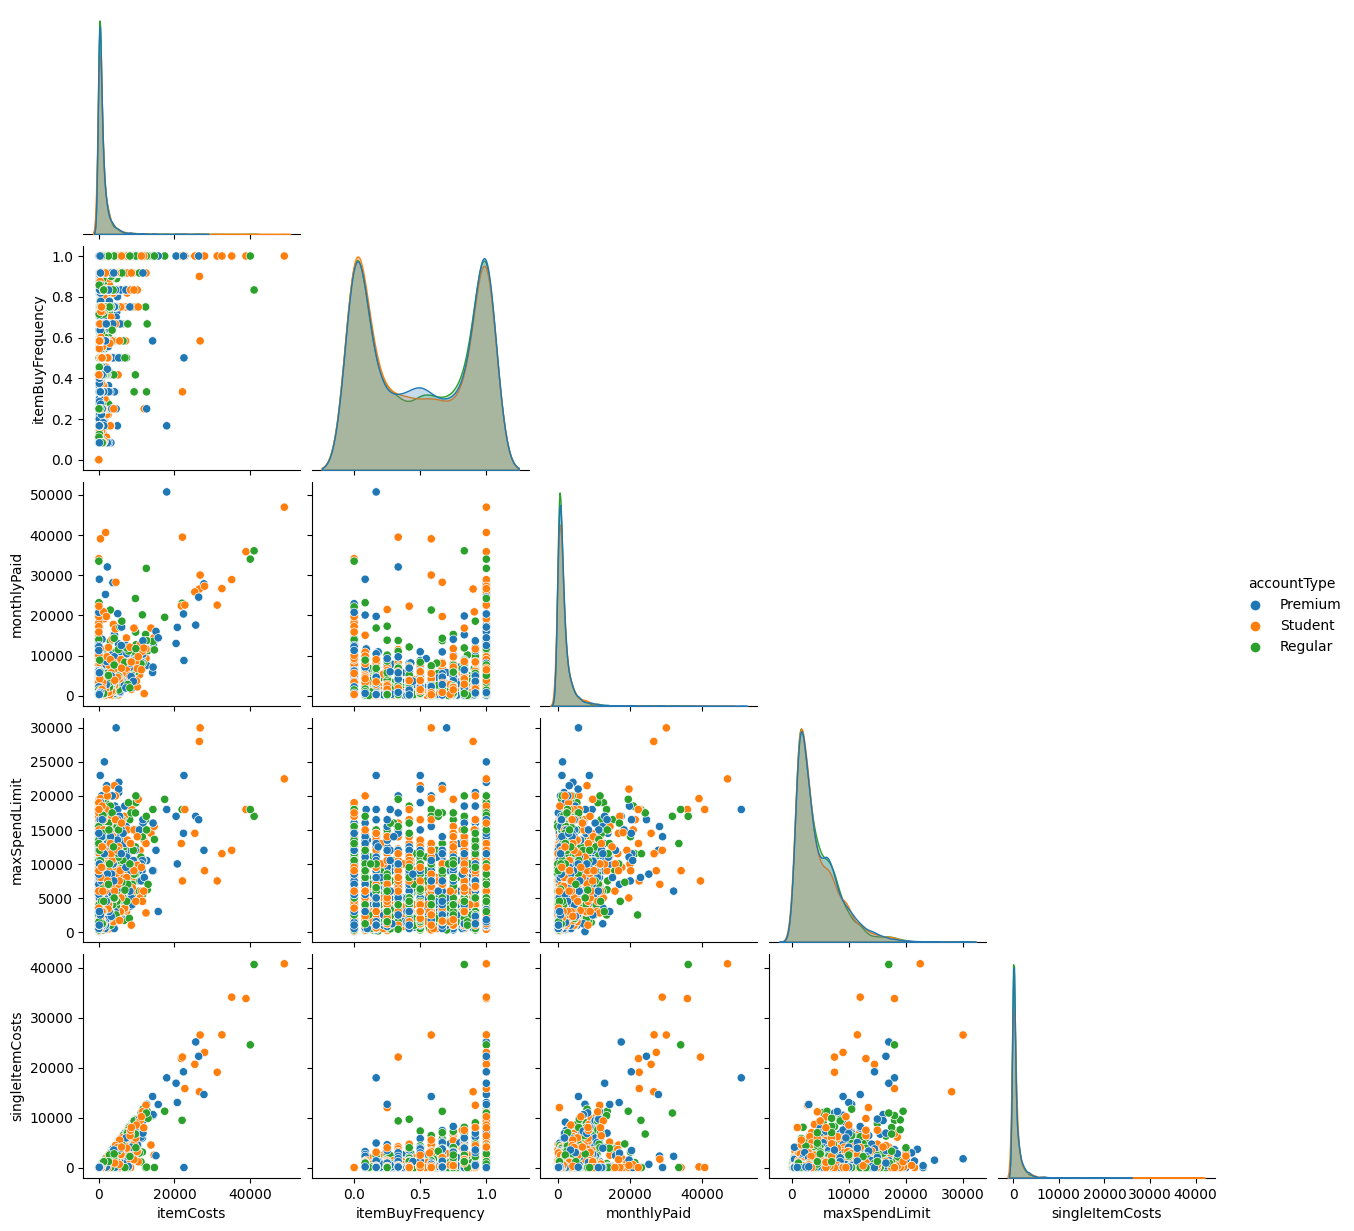

In [195]:
sns.pairplot(df2, vars=[  'itemCosts',
                        'itemBuyFrequency', 'monthlyPaid', 'maxSpendLimit', 'singleItemCosts'],
             hue='accountType', corner=True)

The pairplots displayed suggest that the different account type in fact do not have an effect on the distribution of data. But we have decided to not get rid of it in our feature selection, as "ShopEasy aims to[...] provide an enhanced, personalized shopping experience for its users" meaning that it would be useful to keep different account types.

Before using a heatmap to visualize all the correlations we label encode from sklearn to encode accountType categorical values. We use label encoding for accountType as they can be considered ordinal(where the order of categories is meaningful'premium' being first and 'student' being last). The reasoning as premium account type pay the most, while student account type get discounts so they pay the least. And regular account types pay a normal amount.

In [196]:
df2 = df2.copy()

label_encoder = LabelEncoder()
transformed_column = label_encoder.fit_transform(df2['accountType'])
df2['accountType'] = transformed_column

df2, df

(      accountTotal  frequencyIndex  itemCosts  singleItemCosts  \
 0      1034.660626        0.833333    1308.11          1308.11   
 1       777.853474        0.666667       0.00             0.00   
 2        97.453056        0.818182     334.73           334.73   
 4        18.120946        0.500000      57.00            57.00   
 5       478.834962        1.000000    1060.99          1040.99   
 ...            ...             ...        ...              ...   
 8945   2901.999862        1.000000   11250.65         10165.88   
 8946     25.998310        0.454545     398.57           111.24   
 8947   1859.165344        1.000000       0.00             0.00   
 8948   2931.237524        1.000000     150.00           150.00   
 8949    905.771358        1.000000     116.15            36.15   
 
       multipleItemCosts  emergencyFunds  itemBuyFrequency  \
 0                  0.00      234.602843          0.500000   
 1                  0.00     1820.143378          0.000000   
 2      

In this case the coding labeled encoding encodes premium account type as 0, regular as 1 and  student as 2.

For location categorical values, since it is a nominal data, we chose not to use label encoding as it might assume a natural order in the location, instead using dummy variables would be more appropriate in this case where each category is represented by a binary vector.

In [197]:
df2 = pd.get_dummies(df2, columns=['location'])
df2

,accountTotal,frequencyIndex,itemCosts,singleItemCosts,multipleItemCosts,emergencyFunds,itemBuyFrequency,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyUseFrequency,...,maxSpendLimit,monthlyPaid,leastAmountPaid,paymentCompletionRate,accountLifespan,accountType,webUsage,location_Chicago,location_Los Angeles,location_New York
0,1034.660626,0.833333,1308.11,1308.11,0.00,234.602843,0.500000,0.500000,0.000000,0.166667,...,1500.0,236.764555,207.007715,0.000000,6,0,60,0,0,1
1,777.853474,0.666667,0.00,0.00,0.00,1820.143378,0.000000,0.000000,0.000000,0.500000,...,2000.0,89.741508,173.276205,0.000000,6,0,5,0,1,0
2,97.453056,0.818182,334.73,334.73,0.00,19.551802,0.083333,0.083333,0.000000,0.083333,...,2500.0,234.271939,117.297542,0.250000,12,2,21,0,0,1
4,18.120946,0.500000,57.00,57.00,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,...,1500.0,118.438703,54.138711,0.000000,6,0,59,0,0,1
5,478.834962,1.000000,1060.99,1040.99,20.00,0.000000,0.166667,0.083333,0.083333,0.000000,...,1300.0,1162.790308,208.559750,0.000000,12,0,56,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,2901.999862,1.000000,11250.65,10165.88,1084.77,0.000000,1.000000,1.000000,0.750000,0.000000,...,9500.0,6443.381719,691.328423,0.083333,12,2,59,1,0,0
8946,25.998310,0.454545,398.57,111.24,287.33,0.000000,0.333333,0.083333,0.250000,0.000000,...,2500.0,821.069037,132.906041,0.800000,12,0,17,0,0,1
8947,1859.165344,1.000000,0.00,0.00,0.00,1543.160715,0.000000,0.000000,0.000000,0.083333,...,3500.0,310.775643,659.586136,0.000000,12,2,54,0,1,0
8948,2931.237524,1.000000,150.00,150.00,0.00,1434.135353,0.083333,0.083333,0.000000,0.083333,...,3000.0,577.725789,1683.482088,0.000000,12,0,59,0,1,0


Now we observe the correlation in a more holistic way plotting the correlation heatmap that can help visualize the correlation between all attributes. This will be useful in observing correlation that we might have missed and also aid us in feature selection.

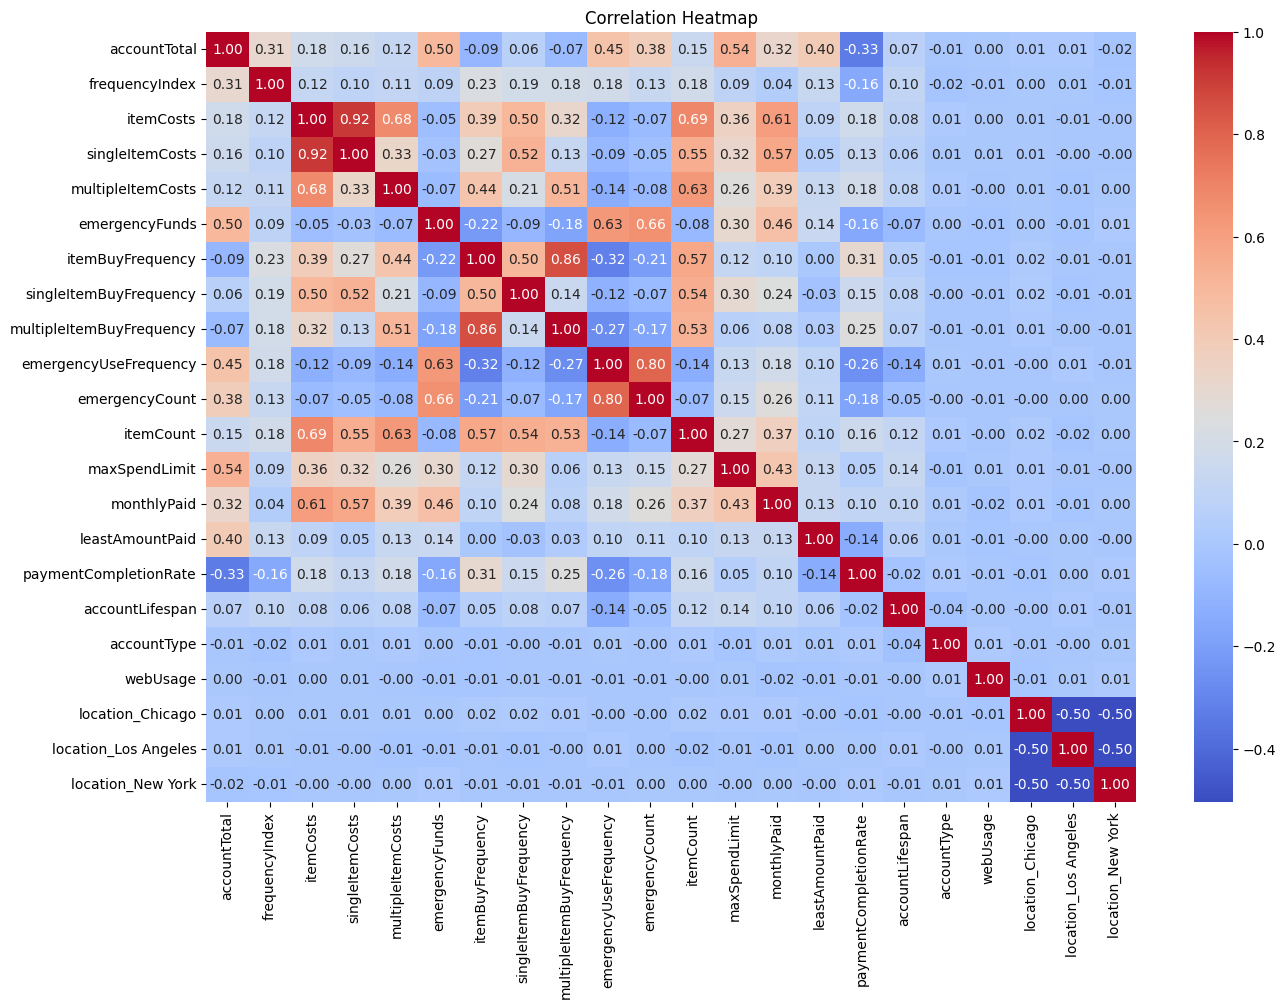

In [198]:
correlation_matrix = df2.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

A few notes can be taken from the correlation heatmap. Firstly, we can confirm that there is no correlation between the locations and other attributes. As mentioned before since we are analyzing customers on an e-commerce website, the ***location*** often does not matter unless it in a whole different country, which in this case it is not. Therefore we decided not to select this feature as it is not relevant to our analysis. It is different for account type as this categorical feature is actually relevant to our analysis even though it has no coorrelation seen in the heatmap with any other feature. From the heatmap one can also observe a few features that can be considered irrelevant for the analysis or redundant. We choose to drop ***accountTotal*** as although it can be an essential feature to evaluate a user's engagement with the e-commerce website, the values it portrayed were inconsistent compared to other attributes such as itemCosts, and monthlypaid meaning either the total amount does not depict a value in money or uses a different currency or in general is inaccurate. Using this logic we also choose to drop ***leastAmountPaid***, having little to no correlation with the other features, as mentioned before, the values portrayed are inconsistent compared to other attributes such as monthlyPaid. After further observation we notice that the attribute ***,monthlyPaid*** also has inconsistencies with attributes such as itemCosts and also add no additional insight that itemCosts wouldn't add therefore we choose to drop monthlyPaid. This also leads to dropping features such as ***webUsage*** and ***frequencyIndex***, not only having little to no correlation with the rest of the features but both also have a very similar definition to itemBuyFrequency which actually does have correlation to other features that are relevant to our analysis. We also drop the feature ***paymentCompletionRate*** for the lack of correlation with other features as well as the lack of insight it can provide. We also consider dropping ***maxSpendLimit*** for the same reason as accountTotal and leastAmountPaid, which is for the reason that it proves to have inconsistencies between other features such as monthly paid, where although the limit is set to a certain value for a user, that same user would have higher singleItemCosts value than the maxSpendLimit value. "The maximum amount the user can spend in a single purchase, set by ShopEasy based on user's buying behavior and loyalty" is the definition of maxSpendLimit and the definition for singleItemCosts is "Costs of items that the user bought in a single purchase without opting for installments" so therefore it is again an inconsistent value and we decide to drop maxSpendLimit. Additonally features such as singleItemBuyFrequency and multipleItemBuyFrequency or singleItemCosts and multipleItemCosts are a more specific version of itemBuyFrequency and itemCosts respectively. These two pair of features can be generalized by itemBuyFrequency and itemCosts and would provide a more significant insight to our analysis compared to the general insigh provided by itemBuyFrequency and itemCosts. Therefore ***itemBuyFrequency*** and ***itemCosts*** are dropped. We also drop ***emergencyUseFrequency*** due to its high correlation and similar definition to emergencyCount, meaning it could be considered redundant to have it.

# PREPROCESSING

Since we are dropping the columns leastAmountPaid and maxSpendLimit which were the columns who originally had the missing data we could theoretically add the missing values back as they wouldn't be missing for the new columns that are present in the dataframe. We choose to directly use the original df.

In [199]:
df3= df.drop(['location', 'accountTotal', 'leastAmountPaid', 'monthlyPaid', 'webUsage', 'frequencyIndex', 'paymentCompletionRate', 'maxSpendLimit', 'itemBuyFrequency', 'itemCosts', 'emergencyUseFrequency'], axis = 'columns')
df3

,singleItemCosts,multipleItemCosts,emergencyFunds,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyCount,itemCount,accountLifespan,accountType
0,1308.11,0.00,234.602843,0.500000,0.000000,1,8,6,Premium
1,0.00,0.00,1820.143378,0.000000,0.000000,8,0,6,Premium
2,334.73,0.00,19.551802,0.083333,0.000000,1,1,12,Student
3,0.00,12.65,0.000000,0.000000,0.083333,0,1,12,Premium
4,57.00,0.00,0.000000,0.166667,0.000000,0,1,6,Premium
...,...,...,...,...,...,...,...,...,...
8945,10165.88,1084.77,0.000000,1.000000,0.750000,0,274,12,Student
8946,111.24,287.33,0.000000,0.083333,0.250000,0,4,12,Premium
8947,0.00,0.00,1543.160715,0.000000,0.000000,5,0,12,Student
8948,150.00,0.00,1434.135353,0.083333,0.000000,3,3,12,Premium


Use the same reasoning as before for label encoding.

In [200]:
df3 = df3.copy()

label_encoder = LabelEncoder()
transformed_column = label_encoder.fit_transform(df3['accountType'])
df3['accountType'] = transformed_column

df3, df

(      singleItemCosts  multipleItemCosts  emergencyFunds  \
 0             1308.11               0.00      234.602843   
 1                0.00               0.00     1820.143378   
 2              334.73               0.00       19.551802   
 3                0.00              12.65        0.000000   
 4               57.00               0.00        0.000000   
 ...               ...                ...             ...   
 8945         10165.88            1084.77        0.000000   
 8946           111.24             287.33        0.000000   
 8947             0.00               0.00     1543.160715   
 8948           150.00               0.00     1434.135353   
 8949            36.15              80.00        0.000000   
 
       singleItemBuyFrequency  multipleItemBuyFrequency  emergencyCount  \
 0                   0.500000                  0.000000               1   
 1                   0.000000                  0.000000               8   
 2                   0.083333            

Now to deal with outliers. Removing values that are considered outliers if more than 4 standard deviations away from the mean. The code identifies the outliers, remove the outliers and count how many outliers would be removed. This helps us understand if we are removing too much of a significant number of values.

In [201]:
def remove_outliers_and_count(df, threshold=4):
    df_cleaned = df.copy()
    original_row_count = len(df)
    total_outliers_removed = 0

    for column in df.columns:
        mean = np.mean(df[column])
        std = np.std(df[column])

        outlier_indices = df_cleaned[(np.abs((df_cleaned[column] - mean) / std) > threshold)].index

        outliers_removed = len(outlier_indices)
        total_outliers_removed += outliers_removed

        df_cleaned = df_cleaned.drop(index=outlier_indices)

    final_row_count = len(df_cleaned)
    print(f"Original number of rows: {original_row_count}")
    print(f"Final number of rows: {final_row_count}")
    print(f"Total outliers removed: {total_outliers_removed}")

    return df_cleaned
remove_outliers_and_count(df3)

Original number of rows: 8950
Final number of rows: 8414
Total outliers removed: 536


,singleItemCosts,multipleItemCosts,emergencyFunds,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyCount,itemCount,accountLifespan,accountType
2,334.73,0.00,19.551802,0.083333,0.000000,1,1,12,2
3,0.00,12.65,0.000000,0.000000,0.083333,0,1,12,0
5,1040.99,20.00,0.000000,0.083333,0.083333,0,4,12,0
6,2565.24,94.97,0.000000,0.416667,0.416667,0,13,12,0
7,907.37,0.00,0.000000,1.000000,0.000000,0,12,12,1
...,...,...,...,...,...,...,...,...,...
8944,0.00,42.56,0.000000,0.000000,0.250000,0,3,12,1
8946,111.24,287.33,0.000000,0.083333,0.250000,0,4,12,0
8947,0.00,0.00,1543.160715,0.000000,0.000000,5,0,12,2
8948,150.00,0.00,1434.135353,0.083333,0.000000,3,3,12,0


Here we understand the number rows removed is 536 which is not a lot and can be considered costless to remove so we proceed with removing process. More can be explained in person or readme.

In [202]:
df_cleaned = df3.copy()
original_row_count = len(df3)
total_outliers_removed = 0

for column in df3.columns:
    mean = np.mean(df3[column])
    std = np.std(df3[column])

    outlier_indices = df_cleaned[(np.abs((df_cleaned[column] - mean) / std) > 4)].index

    outliers_removed = len(outlier_indices)
    total_outliers_removed += outliers_removed

    df_cleaned = df_cleaned.drop(index=outlier_indices)
final_row_count = len(df_cleaned)
print(f"Original number of rows: {original_row_count}")
print(f"Final number of rows: {final_row_count}")
print(f"Total outliers removed: {total_outliers_removed}")
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned

Original number of rows: 8950
Final number of rows: 8414
Total outliers removed: 536


,singleItemCosts,multipleItemCosts,emergencyFunds,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyCount,itemCount,accountLifespan,accountType
0,334.73,0.00,19.551802,0.083333,0.000000,1,1,12,2
1,0.00,12.65,0.000000,0.000000,0.083333,0,1,12,0
2,1040.99,20.00,0.000000,0.083333,0.083333,0,4,12,0
3,2565.24,94.97,0.000000,0.416667,0.416667,0,13,12,0
4,907.37,0.00,0.000000,1.000000,0.000000,0,12,12,1
...,...,...,...,...,...,...,...,...,...
8409,0.00,42.56,0.000000,0.000000,0.250000,0,3,12,1
8410,111.24,287.33,0.000000,0.083333,0.250000,0,4,12,0
8411,0.00,0.00,1543.160715,0.000000,0.000000,5,0,12,2
8412,150.00,0.00,1434.135353,0.083333,0.000000,3,3,12,0


Since the ranges of the attribute values are effectively different from eachother as a rule of thumb we scale the data.

In [203]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_cleaned)

scaled_df = pd.DataFrame(scaled_data, columns=df_cleaned.columns)

scaled_df

,singleItemCosts,multipleItemCosts,emergencyFunds,singleItemBuyFrequency,multipleItemBuyFrequency,emergencyCount,itemCount,accountLifespan,accountType
0,-0.145773,-0.604636,-0.531460,-0.382478,-0.908851,-0.364581,-0.675098,0.338143,1.235104
1,-0.515310,-0.582344,-0.544549,-0.668650,-0.697760,-0.572272,-0.675098,0.338143,-1.218483
2,0.633928,-0.569392,-0.544549,-0.382478,-0.697760,-0.572272,-0.503108,0.338143,-1.218483
3,2.316679,-0.437278,-0.544549,0.762217,0.146607,-0.572272,0.012864,0.338143,-1.218483
4,0.486414,-0.604636,-0.544549,2.765429,-0.908851,-0.572272,-0.044466,0.338143,0.008311
...,...,...,...,...,...,...,...,...,...
8409,-0.515310,-0.529636,-0.544549,-0.668650,-0.275577,-0.572272,-0.560438,0.338143,0.008311
8410,-0.392503,-0.098297,-0.544549,-0.382478,-0.275577,-0.572272,-0.503108,0.338143,-1.218483
8411,-0.515310,-0.604636,0.488571,-0.668650,-0.908851,0.466180,-0.732429,0.338143,1.235104
8412,-0.349712,-0.604636,0.415580,-0.382478,-0.908851,0.050799,-0.560438,0.338143,-1.218483


We check for missing values.

In [204]:
# Check for missing values
missing_values = scaled_df.isnull().sum()

# Display the count of missing values for each column
print("Missing Values Summary:")
print(missing_values)

Missing Values Summary:
singleItemCosts             0
multipleItemCosts           0
emergencyFunds              0
singleItemBuyFrequency      0
multipleItemBuyFrequency    0
emergencyCount              0
itemCount                   0
accountLifespan             0
accountType                 0
dtype: int64


We create a correlation matrix for the new scaled_df to observe any patterns.

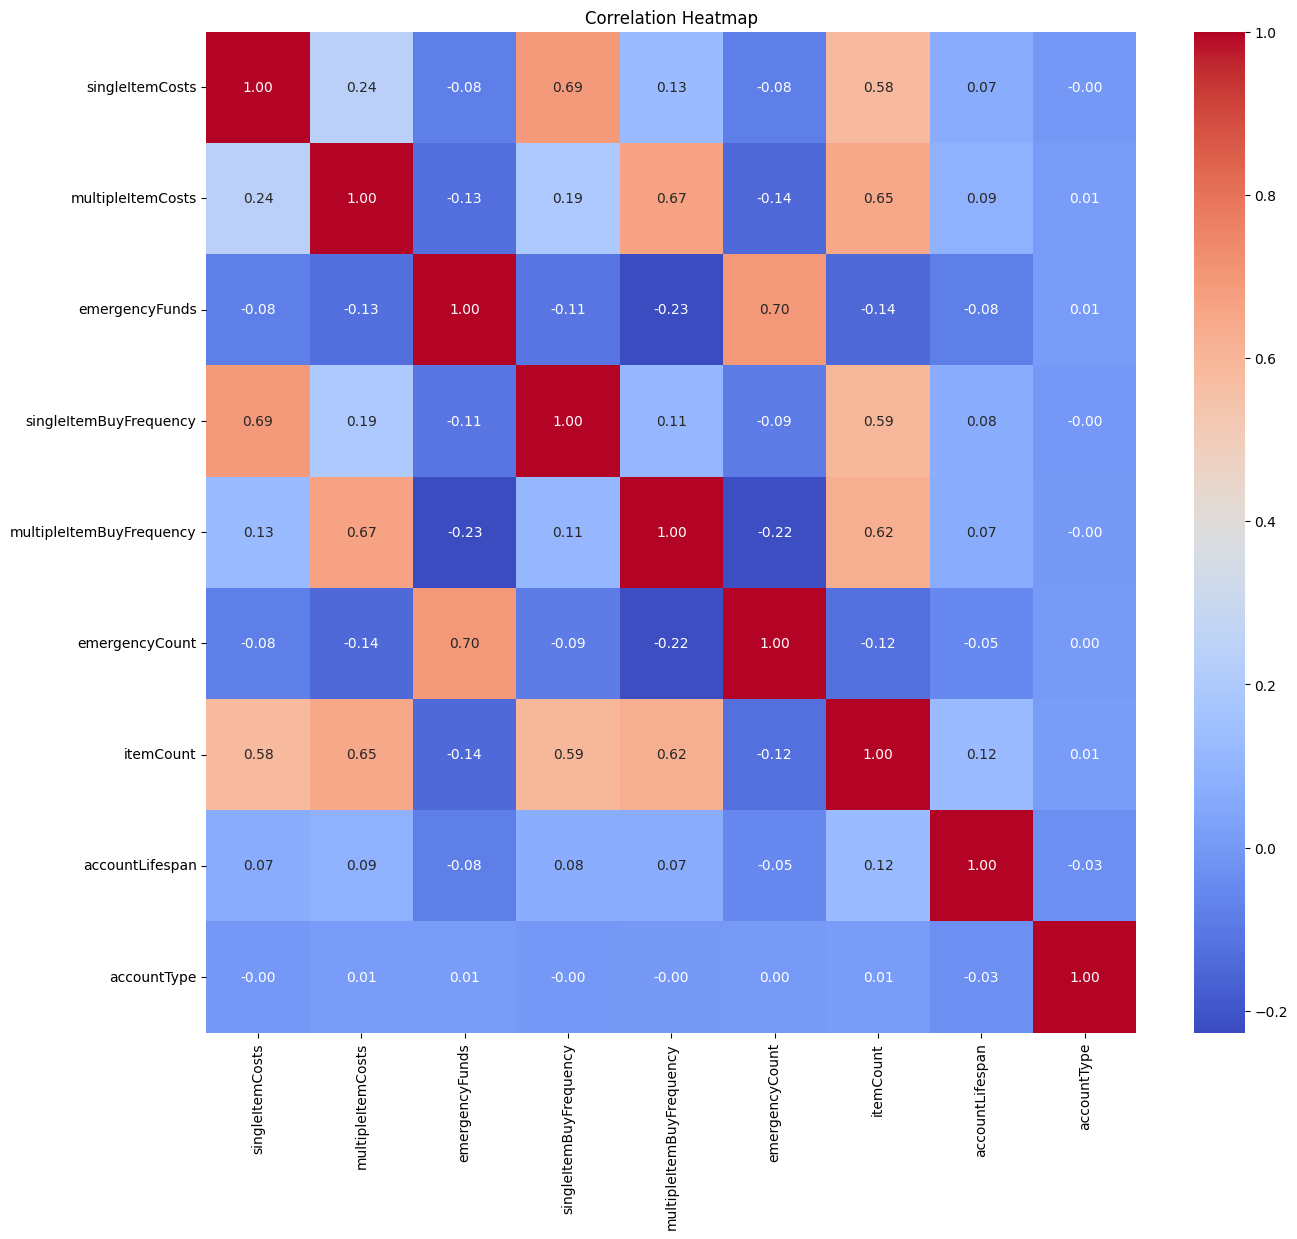

In [205]:
correlation_matrix = scaled_df.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Clustering Models

Understanding why we think this is a clustering problem is also important. Previously, I have mentioned that the dataset provides a mix of numerical and categorical data, ideal for segmentation and clustering analysis. From this we could already rule out regression as it is used to predict a continuous outcome. Instead this question focuses on predicted clusters of customers for a more personal user experience. Instead classification is not chosen as well because it is used in supervised learning meaning, is used when there is already a predefined categorical outcome such as whether the clothes will be on sale or not. In this case instead although we will be dividing the customers/users into clusters(categories) it is not the same as in this case the clusters are not predefined but rather require to be uncovered through analysis of the different clusters that are formed when applying different clustering algorithms. In fact clustering problem is used in unsupervised learning where there is no predefined outcome.


# K-Means ++
We will firstly conduct the K-means clustering model, which is one of the simplest and most common unsupervised machine learning algorthm.

We start with the elbow method. This is used to determine the most fitting number of clusters that should be used. The inertia is, "also known as the within-cluster sum of squares", is measure of how close values in a cluster are to their centroid. Additionaly in this case we did not use silhuoette score range to find the most appropriate number of clusters as overlapping is bound to happen in databases such as these where there is no absolute distinction between each customers. It is important to find the general type of customers and it is enough to use the elbow method for that. Such as in cases where the silhuoette score range will display two clusters as the option with the least overlapping but it would not be insightful from an analysis point of view trying to discover the different types of users in shopeasy. Furthermore, basing our cluster number on silhuoette score can also lead to overfitting as it may suggest a higher number of clusters which will not be insightful or interpretable as subtle differences are not of essential concern, especially in complex and high-dimensional data.

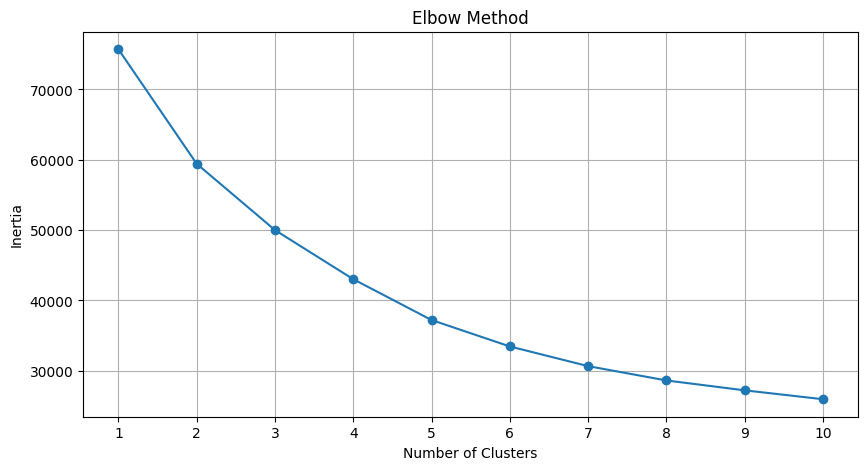

In [206]:
n_clusters_vector = range(1, 11)
inertia = []
for i in n_clusters_vector:
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(n_clusters_vector, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(n_clusters_vector)
plt.grid(True)
plt.show()



Following the elbow plot we are able to see that inertia rapidly decreases from 1-5 but after 5, the decrease of inertia is slowed down. Using this reasoning we believe 5 clusters is the best number of clusters.
Below we calculate and visualize the 5 clusters using k-means++ algorithm.

In [207]:
import plotly.express as px
kmeansmodel = KMeans(n_clusters = 5, init = 'k-means++', n_init = 10, random_state = 42)
labels=kmeansmodel.fit_predict(scaled_df)
clusters = scaled_df.copy()
clusters['label'] = labels
cluster_means = clusters.groupby("label").mean()
polar = cluster_means.reset_index()
polar = pd.melt(polar, id_vars=["label"])
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True, height=800, width=1400)
fig.show()
#plot code inspired by https://towardsdatascience.com/clustering-with-more-than-two-features-try-this-to-explain-your-findings-b053007d680a

We also print out the means of features for each cluster to have a better visualization of the features in each clusters.

In [208]:
print(cluster_means)

       singleItemCosts  multipleItemCosts  emergencyFunds  \
label                                                       
0            -0.252093          -0.312515        0.150262   
1            -0.238445          -0.497773       -0.261680   
2             1.944928           0.961798       -0.307485   
3            -0.261913          -0.399866        1.991899   
4            -0.323015           0.722706       -0.407637   

       singleItemBuyFrequency  multipleItemBuyFrequency  emergencyCount  \
label                                                                     
0                   -0.290354                 -0.181821        0.054436   
1                   -0.198931                 -0.675881       -0.234467   
2                    1.927189                  0.712298       -0.298153   
3                   -0.270560                 -0.562768        1.948052   
4                   -0.373134                  1.222804       -0.416327   

       itemCount  accountLifespan  accountType

The plot above depicts the mean of each attribute in each cluster. This helps us visualize and understand what each cluster represents.
Since we already know the mean of each feature in a scaled dataset is approximately 0 we can compare the means of each feature from the whole dataset with the means of feauture from each cluster. Eg: singleItemBuyFrequency > 0 in cluster 2 and therefore it can be said that cluster 2 has an above avreage singleItemBuyFrequency mean compared to the rest of the dataset.
In this case it would also be interesting to also visualize the percentage of users in each clusters.

In [209]:
pie=clusters.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['red','blue','green','purple','orange'])
#plot code inspired by https://towardsdatascience.com/clustering-with-more-than-two-features-try-this-to-explain-your-findings-b053007d680a

We can also observe the silhuoette score, but as mentioned it will be low as in a dataset such as this where user base preferences can vary greatly there is bound to be overlap.

In [210]:
sil_score = silhouette_score(scaled_df, labels)
print("Silhouette Score: ", sil_score)

Silhouette Score:  0.2608019426418297


The silhuoette score is quite low as predicted, and suggests clusters are not highly distinct. Several similarities could be shared between customers of each cluster, but this does not mean that there are no patterns. Data that is broad-ranging such as this dataset on users on an e-commerce platform can often contain variability and therefore the score can be acceptable to indentify customer clusters for a more personalized user experience.


Further analysis will be done later on.

# Hierchical clustering
Hierchical clustering is another unsupervised machine learning algorithm, usually accompanied by a dendogram depict the similarity and order in which clusters were formed. The first cluster that is formed has the shortest branch.
Before creating the dendrogram, we consider which linkage function to use and after careful consideration we decide that Ward's method is an appropriate function to use as it minimizes within cluster variance providing effective analysis against high variance dataset.

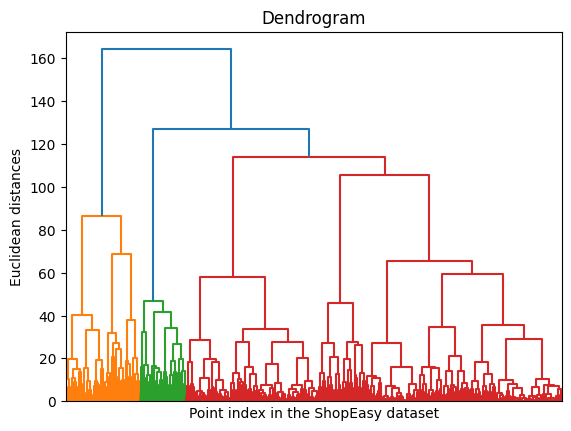

In [211]:
fig, ax = plt.subplots()
linkage_method = sch.linkage(scaled_df, method = 'ward', metric = 'euclidean')
dendrogram = sch.dendrogram(linkage_method, ax = ax)
ax.set_title('Dendrogram')
ax.set_xlabel('Point index in the ShopEasy dataset')
ax.set_ylabel('Euclidean distances')
ax.set_xticks([])
plt.show()

Here we used Scipy's hierarchical clustering functions to compute and plot a dendrogram. The color produced is part of what the function does which is to represent different clusters using color thresholding based on distance between each cluster. Although the dendrogram already shows an optimum number of cluster, the context of the database also has to be considered into the final decision of what number of clusters is best for this dataset. Therefore although the dendrogram depicts 3 ideal clusters, 5 clusters could provide more insight on the types of user base on the platform ShopEasy. Below we use agglomerative clustering to calculate and visualize the clusters.

In [212]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

label_1 = agglomerative_clustering.fit_predict(scaled_df)
clusters_1 = scaled_df.copy()
clusters_1['label'] = label_1
cluster_means1 = clusters_1.groupby('label').mean()
polar = cluster_means1.reset_index()
polar = pd.melt(polar, id_vars=["label"])
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True, height=800, width=1400)
fig.show()
#plot code inspired by https://towardsdatascience.com/clustering-with-more-than-two-features-try-this-to-explain-your-findings-b053007d680a

Here we do the same thing as above and print the cluster means of each feautre.

In [213]:
print(cluster_means1)

       singleItemCosts  multipleItemCosts  emergencyFunds  \
label                                                       
0             1.454781           1.107270       -0.350291   
1            -0.275769          -0.543574       -0.043128   
2            -0.071309          -0.157718        2.189246   
3            -0.303084           0.333500       -0.442396   
4            -0.240182          -0.280134       -0.155915   

       singleItemBuyFrequency  multipleItemBuyFrequency  emergencyCount  \
label                                                                     
0                    1.651528                  0.571206       -0.373099   
1                   -0.302374                 -0.780440       -0.019013   
2                   -0.080350                 -0.225957        2.199955   
3                   -0.359319                  0.967488       -0.461867   
4                   -0.274927                 -0.158351       -0.176083   

       itemCount  accountLifespan  accountType

Here again we visualize the percentage of users in each cluster.

In [214]:
pie=clusters_1.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['red','blue','green','purple', 'orange'])
#plot code inspired by https://towardsdatascience.com/clustering-with-more-than-two-features-try-this-to-explain-your-findings-b053007d680a

And here we calculate the silhuoette score.

In [215]:
sil_score = silhouette_score(scaled_df, label_1)
print("Silhouette Score: ", sil_score)

Silhouette Score:  0.19473892330055398


# DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is another popular clustering algorithm used in unsupervised machine learning. Known for its effectiveness in handling outliers and nested clusters.

In DBSCAN two primary parameters are defined by the user:
1. 'eps' (epsilon) :This parameter defines the max distance allowed between two values for them to be considered in the same neighborhood.
2. Minimum samples (“MinPts”): This parameter determines the fewest/ minimum number of points required in a neighborhood for the point to be a core point. This number includes itself therefore if the parameter is 4, a point needs 3 points in its neighborhood to be conisdered a core point.

For MinPts value there is no automatic method to determine an optimum value. Essentially, it should be set using knowledge of the data set. Some rules that are followed are: larger datasets require larger value of minpts, noisier datase require larger minpts value, and generally should be of greater size or equal to the number of attributes in the data or dimensionality of the data. In this case we'll just follow the rule of MinPts= 2*dim. In this case we have 9 dimensions therefore MinPts = 18.

For 'eps' value, one technique allows us to automatically identify the optimum 'eps' value where it calculates the average distance between each point and its k nearest neighbors. In this case 'k' will be equal to the MinPts we selected above. Then after the average k-distances are calculated, they are plotted in ascending order on a graph where the optimum 'eps' can be found at the maximum curvature(max slope) for 'eps'.


knowledge sourced from: https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

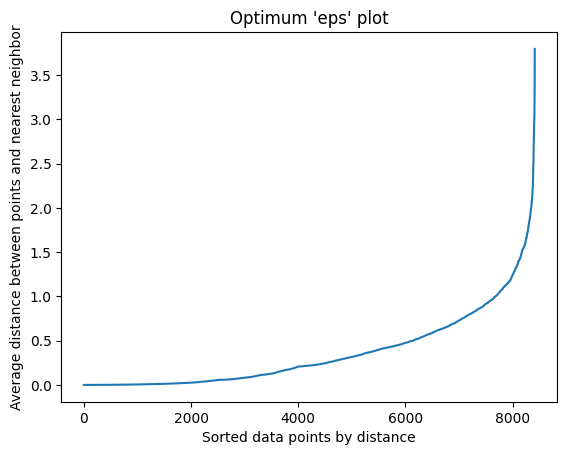

In [216]:
neighbors = NearestNeighbors(n_neighbors=18)
neighbors_fit = neighbors.fit(scaled_df)
distances, indices = neighbors_fit.kneighbors(scaled_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title("Optimum 'eps' plot")
plt.xlabel('Sorted data points by distance')
plt.ylabel('Average distance between points and nearest neighbor')
plt.show()
#code inspired by: https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

The optimum eps value can be found as mentioned before where the curvature is at its maximum. This point represents that "diminishing returns are no longer worth the additional cost." This is because increasing the number of clusters will always improve the fit the of the model, however it comes at the risk of overfitting. Here the approximate value of curvuture is around 1 and therefore we define 'eps' as 1.

knowledge source from: https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

Below we visualize the clustering of DBSCAN.

In [217]:
dbscan_clustering = DBSCAN(eps = 1.2, min_samples =18)
label_2 = dbscan_clustering.fit_predict(scaled_df)
clusters_2 = scaled_df.copy()
clusters_2['label'] = label_2
cluster_means2 = clusters_2.groupby('label').mean()
polar = cluster_means2.reset_index()
polar = pd.melt(polar, id_vars=["label"])
fig = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True, height=800, width=1400)
fig.show()

Print cluster mean of each feature.

In [218]:
print(cluster_means2)

       singleItemCosts  multipleItemCosts  emergencyFunds  \
label                                                       
-1            1.244361           0.969090        0.781286   
 0           -0.235441          -0.166923       -0.117559   
 1           -0.190501          -0.177864       -0.137585   
 2           -0.202590          -0.144360       -0.138392   

       singleItemBuyFrequency  multipleItemBuyFrequency  emergencyCount  \
label                                                                     
-1                   0.943034                  0.534184        0.721377   
 0                  -0.180421                 -0.116124       -0.119524   
 1                  -0.136610                 -0.089958       -0.133165   
 2                  -0.159289                 -0.064499       -0.111228   

       itemCount  accountLifespan  accountType  
label                                           
-1      1.249275        -0.398530     0.027559  
 0     -0.233019         0.028634  

A point to note is that due to the nature of our dataset, which is that it has a high variance, DBSCAN could produce different results from the other two methods, as it is very effective in identifying and removing outliers. The cluster labeled '-1' in fact is all the noise values that are not considered in any cluster. We can see how many values are considered noise through the pie chart.

In [219]:
pie=clusters_2.groupby('label').size().reset_index()
pie.columns=['label','value']
px.pie(pie,values='value',names='label',color=['red','blue','green','purple'])
#plot code inspired by https://towardsdatascience.com/clustering-with-more-than-two-features-try-this-to-explain-your-findings-b053007d680a

As seen in the pie chart more than 14% of data values are excluded and considered noise. That is 1211 data points excluded from the final analysis. This leads to an inaccurate insight when observing the clusters as it might exclude particular shopping habit of users who vary from clusters. This can be considered a very huge difference compared to the other two clustering methods, and therefore we will not consider DBSCAN when analyzing the different clusters for insight.

In [220]:
non_noise_indices = label_2 != -1
non_noise_data = scaled_df[non_noise_indices]
non_noise_labels = label_2[non_noise_indices]
sil_score = silhouette_score(non_noise_data, non_noise_labels)
print("Silhouette Score: ", sil_score)

Silhouette Score:  0.11019299423577715


# Cluster Analysis
For the analysis of customer segment we’ll mainly use the results found in K-Means ++ clustering and Hierarchical clustering as we achieved the same number of segments and similar results to each other. As mentioned before due to the removal of a large percentage of data considered as noise in DBSCAN we exclude it from the analysis. Firstly we identify 5 number of segments. We could’ve chosen 3 for a better silhouette score in hierarchical clustering, but we believe that 5 will give us the most insight in analysing and providing a more personal user shopping experience. In K- means ++ the first cluster we can observe that stands out to us is labeled as cluster number 2. It has the highest mean singleItemCosts, multipleItemCosts, singleItemBuyFrequency, itemCount, and accountLifespan. It also has the lowest mean accountType and second highest mean multipleBuyFrequency. From these features we can already have a general understanding of what this cluster represents. This cluster can be defined as a high spending long term user base with a focus in single instalment purchases. This cluster makes up 12 percent of the total dataset with 1013 users. The low account type mean of -0.046186 can also suggest that they are composed largely of premium and regular account type user base(premium account type are defined as -1.218483, regular account type as 0.008311, and student account type as 1.235104).  A similar cluster is made using the hierarchical clustering method, which is cluster number 0, it has the highest mean singleItemCosts, multipleItemCosts, singleItemBuyFrequency, and ItemCount as well as second highest mean multipleItemBuyFrequency and accountLifespan and second to lowest mean accountType of -0.010072. Similar to K-means++, here this cluster takes up 15.1% of the whole user database. Therefore we can identify our first cluster as High spending long term premium/regular users with a focus in in single instalment purchases.

Our second cluster can be said to be quite similar to our first cluster but also very different. This user base can be identified in the K-means++ as cluster 4, with the highest mean multipleItemBuyFrequency, and second highest mean multipleItemCosts, ItemCount, and accountLifeSpan. This indicate the cluster has a high spending long term user that is more oriented in buying items through multiple instalments.  They also have the second to lowest value in accountType of -0.005989 indicating they are composed mostly of regular and premium users. This cluster makes up for 24.5% of the user base. This is also the case in hierarchical clustering where cluster 3 has the highest mean multipleItemBuyFrequency and accountLifeSpan,  second highest mean multipleItemCosts, and ItemCount. They also have an accountType of -0.00421 which is the third to lowest but still indicate in general a vast number of users in between regular and premium.  The percentage of users in this cluster is 26.7% very similar to the results we have in K-means++ and so we have identified our second cluster as High spending long term premium/regular users with a focus in multiple instalment purchases.

Next we can see in both models that there is cluster that has the highest emergencyCount and emergencyFunds. First in the K-means++ model we observe that cluster 3 has the highest emergencyCount and emergencyFunds by a lot almost 2 in value compared to the rest of the clusters. They also have the second to lowest accountLifespan and second to highest accountType of 0.002396. They have the second to lowest singleItemCosts, and multipleItemCosts, as well as multipleItemBuyFrequency and third to lowest singleItemBuyFrequency. In general this cluster has multiple below average features with emergencyCount and emergencyFunds standing out. emergencyFunds is defined as "Amount that the user decided to keep as a backup in their ShopEasy wallet “ therefore this user base could be users that rely solely on their ShopEasy wallet. An interesting observation is that their account type is the second highest indicating some number of student users as well, although still below 0.008311 which is what regular users are classified as. Therefore we can define this cluster a mix of all users. There is also another aspect to note which is accountLifeSpan, but user with lower accountLifespan tend to have higher emergencyCount and emergencyFunds meaning this may be a more newer feature in shopEasy that user are taking advantage of.   Let’s observe hierarchical clustering to check whether the same is true for its clusters. We can notice immediately two spikes in emergencyFunds and emergencyCount with cluster two. It also has the second highest accountType and the second lowest accountLifespan. All similar to k-means++. Due to the efficiency and convenience of using an online wallet, but also having a lower value in other features such as ItemCount users might be using the wallet as budgeting tool using only a certain amount allocated by the user but as well as saving the money for limited time offers without needed to do large bank transfers and so we call our user base Efficient wallet reserver users. These users are 12.3 percent of users in K-means++ and 9.26 percent of users in hierarchical clustering. Still quite similar.

Our fourth cluster also has a very defining feature in both models which is a very  low accountLifespan and the highest accountType. In K-means++ they have an accountType value of 0.165837 indicating  a number of users in this cluster are between student and regular. It also has below the mean features such as singleItemCosts multipleItemCosts, singleItemBuyFrequency, multipleItemBuyFrequency, and itemCount. This can be explained by the fact that they are all new accounts and have not spent much money on the website. This is also the case for hierarchical clustering where all features mentioned above are below average and also emergencyCount is below average. This can be a defining feature for the fourth cluster which as that their simply New Users, this is mostly because their accountLifespan is very very low compared to the rest of the users. These users make up 6.11 % of users in kmeans++ and 9.39% of users in Hierarchical clustering.

The fifth and final cluster doesn’t really have any defining features. In Kmeans++ it has below average means in all the features except for accountLifeSpan with and accountType of -0.007546. This can indicate that the account has been inactive as although the accountLifespan is quite high or at least above average, its other features are all mediocre in comparison or below average. The account type reveals that its mostly users between premium and regular.  The same is said for the cluster in hierarchical clustering model where all features are below average except for accountLifespan and accountType value of -0.017117. This indicates that this cluster is mostly user base of inactive premium/regular users. This user base makes up a large number of the whole dataset of 45.1% in kmeans++ and 39.6% in hierarchical clustering.